In [112]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [113]:
import pandas as pd
Big_df = pd.read_csv('gdrive/MyDrive/Consumer_Complaints.csv')

In [114]:
import gensim

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [115]:
df= Big_df.head(50000)

In [116]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,01-10-2017,Bank account or service,Checking account,Deposits and withdrawals,NaN,I filled XXXX total complaints against a compa...,NaN,KEYCORP,CO,802XX,NaN,Consent provided,Web,01-10-2017,Closed with explanation,Yes,No,2283683,NaN
49996,08/31/2015,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,U.S. BANCORP,TN,38117,NaN,Consent not provided,Web,08/31/2015,Closed with explanation,Yes,No,1544338,NaN
49997,09/30/2014,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Experian Information Solutions Inc.,FL,33122,NaN,NaN,Web,09/30/2014,Closed with explanation,Yes,No,1050703,NaN
49998,10/28/2016,Student loan,Non-federal student loan,Can't repay my loan,Can't decrease my monthly payments,"I borrowed from then XXXX, now Navient, a tota...",NaN,"Navient Solutions, LLC.",FL,328XX,NaN,Consent provided,Web,10/28/2016,Closed with explanation,Yes,No,2184673,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 50000 non-null  object 
 1   Product                       50000 non-null  object 
 2   Sub-product                   35109 non-null  object 
 3   Issue                         50000 non-null  object 
 4   Sub-issue                     21052 non-null  object 
 5   Consumer Complaint            10663 non-null  object 
 6   Company Public Response       13488 non-null  object 
 7   Company                       50000 non-null  object 
 8   State                         49599 non-null  object 
 9   ZIP code                      49597 non-null  object 
 10  Tags                          6861 non-null   object 
 11  Consumer consent provided?    20155 non-null  object 
 12  Submitted via                 50000 non-null  object 
 13  D

In [118]:
df.loc[df['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df = df[df.Product != 'Other financial service']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [119]:
df = df[pd.notnull(df['Consumer Complaint'])]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10638 entries, 1 to 49998
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 10638 non-null  object 
 1   Product                       10638 non-null  object 
 2   Sub-product                   7277 non-null   object 
 3   Issue                         10638 non-null  object 
 4   Sub-issue                     5469 non-null   object 
 5   Consumer Complaint            10638 non-null  object 
 6   Company Public Response       4996 non-null   object 
 7   Company                       10638 non-null  object 
 8   State                         10610 non-null  object 
 9   ZIP code                      10610 non-null  object 
 10  Tags                          1728 non-null   object 
 11  Consumer consent provided?    10638 non-null  object 
 12  Submitted via                 10638 non-null  object 
 13  D

In [121]:
col = ['Product', 'Consumer Complaint']
df = df[col]

In [122]:
df.columns = ['Product', 'Complaints']


In [123]:
df

,Product,Complaints
1,"Credit reporting, credit repair services, or o...",I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,"Credit reporting, credit repair services, or o...",An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...
...,...,...
49985,Student loan,I received my degree from University XXXX XXXX...
49986,Credit card or prepaid card,Capital One has intimidated and harasses me an...
49994,"Credit reporting, credit repair services, or o...",3 Months Ago in XX/XX/XXXX I discovered Items ...
49995,Bank account or service,I filled XXXX total complaints against a compa...


In [124]:
df.head(2).T 

,1,2
Product,"Credit reporting, credit repair services, or o...",Consumer Loan
Complaints,I have outdated information on my credit repor...,I purchased a new car on XXXX XXXX. The car de...


In [125]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

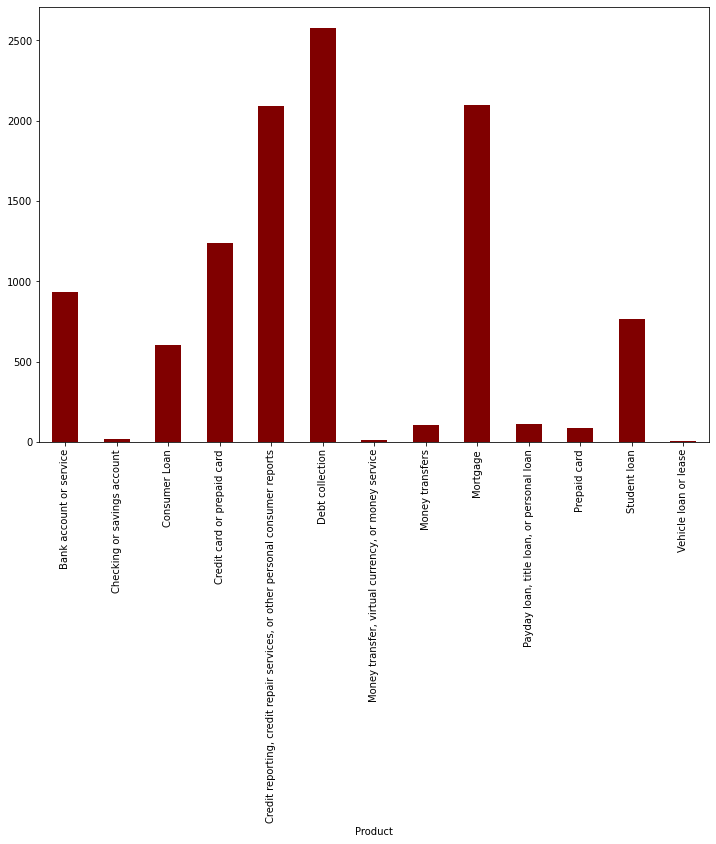

In [126]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

df.groupby('Product').Complaints.count().plot.bar(ylim=0,color='maroon')
plt.show()

In [127]:
df

,Product,Complaints,category_id
1,"Credit reporting, credit repair services, or o...",I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,"Credit reporting, credit repair services, or o...",An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2
...,...,...,...
49985,Student loan,I received my degree from University XXXX XXXX...,6
49986,Credit card or prepaid card,Capital One has intimidated and harasses me an...,4
49994,"Credit reporting, credit repair services, or o...",3 Months Ago in XX/XX/XXXX I discovered Items ...,0
49995,Bank account or service,I filled XXXX total complaints against a compa...,5


In [128]:
stats = df.groupby("Product")

# Summary statistic of all countries
stats.describe().head()

category_id             \
                                                         count  mean  std   
Product                                                                     
Bank account or service                                  933.0   5.0  0.0   
Checking or savings account                               15.0  11.0  0.0   
Consumer Loan                                            600.0   1.0  0.0   
Credit card or prepaid card                             1241.0   4.0  0.0   
Credit reporting, credit repair services, or ot...      2089.0   0.0  0.0   

                                                                            \
                                                     min   25%   50%   75%   
Product                                                                      
Bank account or service                              5.0   5.0   5.0   5.0   
Checking or savings account                         11.0  11.0  11.0  11.0   
Consumer Loan                                        1.0   1.0   1.0   1.0   
Credit card or prepaid card                          4.0   4.0   4.0   4.0   
Credit reporting, credit repair services, or ot...   0.0   0.0   0.0   0.0   

                                                          
                                                     max  
Product                                                   
Bank account or service                              5.0  
Checking or savings account                         11.0  
Consumer Loan                                        1.0  
Credit card or prepaid card                          4.0  
Credit reporting, credit repair services, or ot...   0.0

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=4, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Complaints).toarray()
labels = df.category_id
features.shape

(10638, 36894)

In [130]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
# 'Bank account or service':

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Bank account or service':
  . Most correlated unigrams:
       . deposit
       . overdraft
  . Most correlated bigrams:
       . overdraft fees
       . checking account


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Checking or savings account':
  . Most correlated unigrams:
       . clerical
       . 2018
  . Most correlated bigrams:
       . xx 2018
       . transactions did


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Consumer Loan':
  . Most correlated unigrams:
       . vehicle
       . car
  . Most correlated bigrams:
       . auto loan
       . car loan


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . rewards
       . card
  . Most correlated bigrams:
       . annual fee
       . credit card


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
       . experian
       . equifax
  . Most correlated bigrams:
       . trans union
       . credit report


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Debt collection':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . collect debt
       . collection agency


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
       . msg
       . coinbase
  . Most correlated bigrams:
       . withdrew xxxx
       . coinbase account


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Money transfers':
  . Most correlated unigrams:
       . western
       . paypal
  . Most correlated bigrams:
       . money transfer
       . western union


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Mortgage':
  . Most correlated unigrams:
       . modification
       . mortgage
  . Most correlated bigrams:
       . mortgage company
       . loan modification


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Payday loan, title loan, or personal loan':
  . Most correlated unigrams:
       . ace
       . payday
  . Most correlated bigrams:
       . took payday
       . payday loan


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Prepaid card':
  . Most correlated unigrams:
       . prepaid
       . rushcard
  . Most correlated bigrams:
       . rush card
       . prepaid card


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Student loan':
  . Most correlated unigrams:
       . student
       . navient
  . Most correlated bigrams:
       . student loans
       . student loan
# 'Vehicle loan or lease':
  . Most correlated unigrams:
       . 79
       . lemon
  . Most correlated bigrams:
       . dealership told
       . days took


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


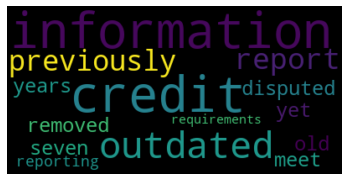

In [131]:
# Start with one review:
text = df.Complaints[1]


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

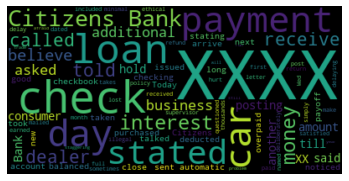

In [132]:
# Start with one review:
text = df.Complaints[2]


# Create and generate a word cloud image:
wordcloud2 = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

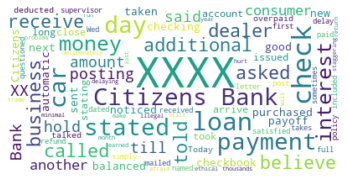

In [133]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

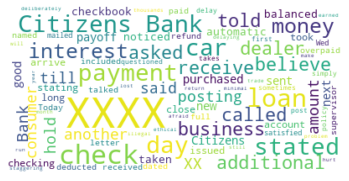

In [134]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [135]:
?WordCloud

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Complaints'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [137]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))


['Debt collection']


In [138]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))


['Credit reporting, credit repair services, or other personal consumer reports']


In [139]:
df[df['Complaints'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]


,Product,Complaints,category_id
12,Debt collection,This company refuses to provide me verificatio...,2


In [140]:
df[df['Complaints'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]


,Product,Complaints,category_id
61,"Credit reporting, credit repair services, or o...",I am disputing the inaccurate information the ...,0


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


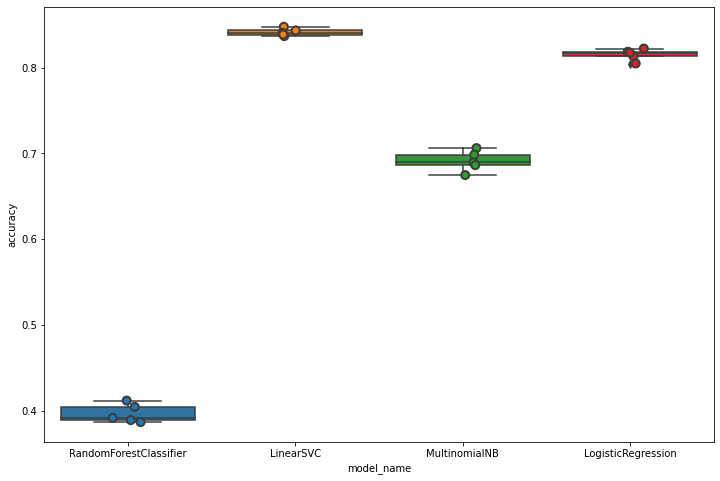

In [142]:
import seaborn as sns
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [143]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.841511
LogisticRegression        0.815378
MultinomialNB             0.691202
RandomForestClassifier    0.396786
Name: accuracy, dtype: float64

In [144]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

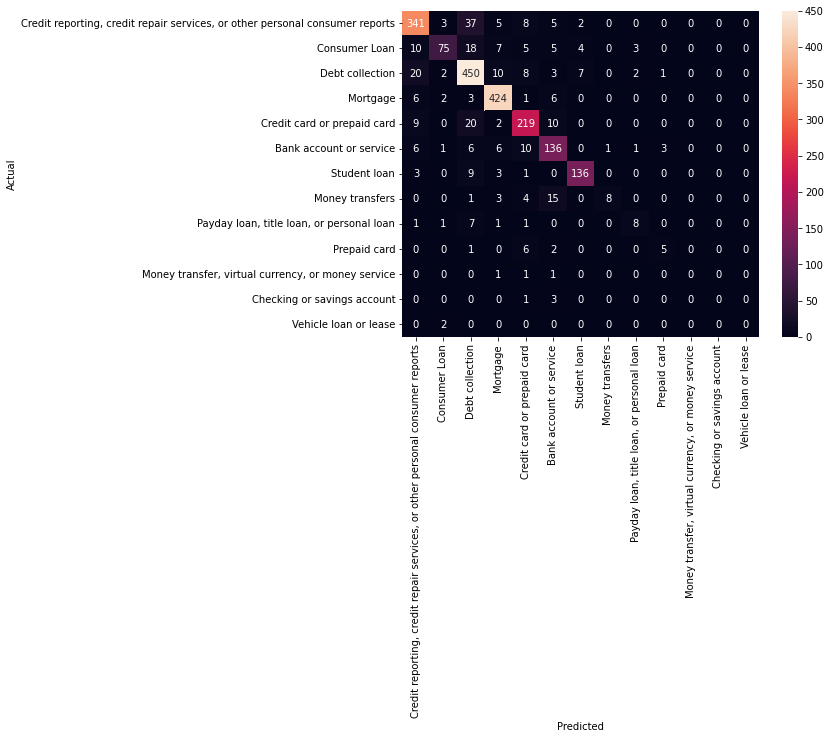

In [145]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [146]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Complaints']])
      print('')

'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 10 examples.


,Product,Complaints
36459,Consumer Loan,"XXXX XXXX XXXX, acct XXXX .... I submitted doc..."
24369,Consumer Loan,I purchased a car XX/XX/XXXX. At the time I ha...
8293,Consumer Loan,I have multiple inquiries on my equifax report...
11285,Consumer Loan,I have not been given credit for the payments ...
26793,Consumer Loan,THERE ARE UNKNOW INQUIRES ON MY CREDIT REPORT ...
2727,Consumer Loan,"Quoting them, your first loan application, the..."
40460,Consumer Loan,I have been working for more than XXXX to have...
13888,Consumer Loan,I was turned down for a loan by Honda Finacial...
35472,Consumer Loan,"On XXXX XXXX, XXXX I became aware that I am a ..."
11571,Consumer Loan,i filed Chapter XXXX the trustee was making pa...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 20 examples.


,Product,Complaints
13587,Debt collection,DIVERSIFIELD CONSULTANTS INC HAVE VIOLATED FCR...
49932,Debt collection,This creditor has reported delinquencies on my...
13370,Debt collection,Account was sent to collections ( National Cre...
11870,Debt collection,XXXX XXXX XXXX is reporting negatively on my c...
42096,Debt collection,There is an account that is my wife 's only an...
37444,Debt collection,CRA VIOLATION / NO KNOWLEDGE OF THE FRAUDULENT...
27281,Debt collection,On XX/XX/XXXX my daughter started an Applicati...
22215,Debt collection,HIPAA VIOLATION / CRA VIOLATION NO KNOWLEDGE O...
21477,Debt collection,I was XXXX for 9 yrs of my life. My identity w...
24517,Debt collection,"XXXX XXXX, KROSS, LIEBERMAN & STONE said I owe..."



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Complaints
23974,Mortgage,Realtime Resolutions is reporting a loan that ...
39532,Mortgage,I got a call from a man with an XXXX accent cl...
17461,Mortgage,I submitted a claim on XXXX/XXXX/16 [ Case num...
864,Mortgage,Mortgage broker did Credit inquiry on my credi...
37048,Mortgage,I recently viewed on my XXXX Credit Report a h...
4751,Mortgage,I have XXXX hard inquiries from Safe Rent ( XX...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 9 examples.


,Product,Complaints
39872,Credit card or prepaid card,I have applied for a credit line increase on s...
5496,Credit card or prepaid card,I am unable to log in to the Discover website ...
21897,Credit card or prepaid card,I have inquiries on my credit report that are ...
22841,Credit card or prepaid card,I filed a complaint against B of A and they se...
44980,Credit card or prepaid card,I never had any credit cards opened in my name...
36347,Credit card or prepaid card,CFBPI have XXXX Bank of America Credit cards l...
23518,Credit card or prepaid card,Just not my account and showing under my XXXX ...
20839,Credit card or prepaid card,acct closed under CHP XXXX bankruptcy and stil...
23965,Credit card or prepaid card,The Chase account has been reporting on my per...



'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Complaints
45901,Bank account or service,I want this company ( Xoom ) to remove all my ...
25804,Bank account or service,I have been trying since XXXX to get XXXX hard...
19545,Bank account or service,have fraudulant charges on my card ... .did re...
45704,Bank account or service,The problem is with EXPERIANTo know my score I...
16959,Bank account or service,"Hello, I am disputing the charge of {$1000.00}..."
45166,Bank account or service,I purchased an item online from XXXX XXXX XXXX...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 37 examples.


,Product,Complaints
25967,"Credit reporting, credit repair services, or o...",The following accounts are showing on my credi...
32223,"Credit reporting, credit repair services, or o...",I have an item from XXXX XXXX out of XXXX XXXX...
210,"Credit reporting, credit repair services, or o...",XXXX has wrongfully placed an account in colle...
36124,"Credit reporting, credit repair services, or o...",Contacted XXXX regarding a medical collection ...
31331,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX collection agency is reporting ...
5846,"Credit reporting, credit repair services, or o...",Requested bureau remove account as it was not ...
19856,"Credit reporting, credit repair services, or o...","BYL collection services XXXX XXXX PA, XXXX XXX..."
14256,"Credit reporting, credit repair services, or o...",XXXX offered me a pay and delete offer in XXXX...
33406,"Credit reporting, credit repair services, or o...",On-Site.com denied me from renting an apartmen...
46905,"Credit reporting, credit repair services, or o...","Disputed final bill amount with XXXX XXXX, for..."



'Consumer Loan' predicted as 'Debt collection' : 18 examples.


,Product,Complaints
37951,Consumer Loan,"it my belief, base discrimintion ( treatment )"
32601,Consumer Loan,This is NOT a duplicate complaint. \n\nThis wa...
17164,Consumer Loan,"On the companies website, they show a due date..."
22854,Consumer Loan,Glennon Law Firm LLC was hired by XXXX XXXX to...
26332,Consumer Loan,"CHARGED OFF ACCOUNT THAT WAS PAID IN FULL, IS ..."
9634,Consumer Loan,"Luna Financial located at XXXX XXXX XXXX XXXX,..."
38535,Consumer Loan,currently refinace this accout with Conn 's .....
13539,Consumer Loan,Toyota Financial Services ( TFS ) calls us inc...
1781,Consumer Loan,Mercedes Benz Financial was notified on or abo...
49194,Consumer Loan,Being harassed.. phone calls and threats. Told...



'Credit card or prepaid card' predicted as 'Debt collection' : 20 examples.


,Product,Complaints
39417,Credit card or prepaid card,"Today, XXXX XXXX 2016, I received a call from ..."
10750,Credit card or prepaid card,I have been receiving bills for care credit. I...
14430,Credit card or prepaid card,I actually have quite a few complaints about R...
22784,Credit card or prepaid card,JP Penney claims that they sent the bill of {$...
11375,Credit card or prepaid card,This company closed my account in XXXX 2015. T...
18485,Credit card or prepaid card,I entered a payment plan to settle outstanding...
33659,Credit card or prepaid card,My first statement from the company was sent d...
14544,Credit card or prepaid card,I ordered a radar detector from XXXX on XX/XX/...
41745,Credit card or prepaid card,Walmart/synchrony bank account XXXX. Opened XX...
26630,Credit card or prepaid card,I have had muitiple calls from the XXXX XXXX a...



'Bank account or service' predicted as 'Debt collection' : 6 examples.


,Product,Complaints
7804,Bank account or service,"Simply, I am trying to locate and ascertain th..."
44088,Bank account or service,SYNCB/CARECR ACCOUNT NUMBERs : XXXX XX/XX/XXXX...
45342,Bank account or service,According to the Fair Debt Collection Practice...
35623,Bank account or service,A company that poses as a collection company c...
20423,Bank account or service,BANK OF AMERICA IS A DEFINATE CRIMINAL!! HERES...
26446,Bank account or service,"On XXXX/XXXX/2014, I paid a company called XXX..."



'Student loan' predicted as 'Debt collection' : 9 examples.


,Product,Complaints
46048,Student loan,"In XXXX helped my daughter get a loan, the gal..."
5112,Student loan,I received a deferment on my student loan two ...
40583,Student loan,"Since around XX/XX/XXXX, I have probably recei..."
46466,Student loan,I called American Education ServicesXXXX for a...
8778,Student loan,I was told that it could be wiped off and cons...
31719,Student loan,My workplace has instructed Navient to cease c...
34301,Student loan,Apparently this company Transworld Systems Inc...
24143,Student loan,The company is National Enterprise Systems not...
8536,Student loan,"Mis-allocation of funds more than XXXX time, a..."



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 7 examples.


,Product,Complaints
45667,"Payday loan, title loan, or personal loan","HARASSING PHONE CALLS ON MY CELL NUMBER, THREA..."
27918,"Payday loan, title loan, or personal loan",I had a online payday loan with XXXX a few yea...
24879,"Payday loan, title loan, or personal loan",i paid two weeks in advance after taking my da...
48248,"Payday loan, title loan, or personal loan",A few years ago ( between XXXX and mid XXXX ) ...
46412,"Payday loan, title loan, or personal loan",I paid the balance of the loan and now they sa...
32576,"Payday loan, title loan, or personal loan",A company called cashnet has provided me a cre...
8317,"Payday loan, title loan, or personal loan","I 'm unaware of this payday loan, I 've disput..."



'Consumer Loan' predicted as 'Mortgage' : 7 examples.


,Product,Complaints
3714,Consumer Loan,They added insurance without my permission and...
1851,Consumer Loan,I have a corporate auto loan with Bank of Amer...
10748,Consumer Loan,I have a personal loan with SoFi. On XXXX XXXX...
45131,Consumer Loan,In reference to Case No.XXXX wherein SoFi Lend...
18636,Consumer Loan,I have an installment loan with high interest ...
46975,Consumer Loan,I have my auto loan with Wells Fargo Dealer Se...
20213,Consumer Loan,"On XXXX XXXX, I applied for the iPhone Upgrade..."



'Debt collection' predicted as 'Mortgage' : 10 examples.


,Product,Complaints
36785,Debt collection,On XXXX/XXXX/2016 Bayview Loan Servicing becam...
38371,Debt collection,Ocwen created a new mortgage with loan number ...
14317,Debt collection,I must start by saying this has nothing to do ...
34452,Debt collection,In 2007 I purchased a condo in XXXX and took o...
36761,Debt collection,I was not working for almost XXXX years and wa...
33179,Debt collection,This complaint is concerning collection calls ...
39007,Debt collection,Has in the past threatened to take legal actio...
32178,Debt collection,I am experiencing financial hardship due to pr...
48200,Debt collection,I have been working with Di-Tech Financial in ...
33299,Debt collection,My phone rang at XXXX from Bayview Home Loans ...



'Bank account or service' predicted as 'Mortgage' : 6 examples.


,Product,Complaints
10803,Bank account or service,Bank of America let me apply for a mortgage fo...
26300,Bank account or service,I opened a home equity line of credit with XXX...
49736,Bank account or service,US Bank and XXXX XXXX violated NJ and federal ...
9077,Bank account or service,I applied for a home mortgage with Wells Fargo...
8488,Bank account or service,I opened a Line of Credit with Chase on XX/XX/...
2546,Bank account or service,I have been refinanced my mortgage with AmeriS...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 8 examples.


,Product,Complaints
33812,"Credit reporting, credit repair services, or o...",I NOTICE THAT CAPITAL ONE HAS BEEN REPORTING M...
14328,"Credit reporting, credit repair services, or o...",I had surgery late XXXX and I was out of commi...
41407,"Credit reporting, credit repair services, or o...",I was told I was getting a loan to pay for XXX...
19001,"Credit reporting, credit repair services, or o...",I applied for a credit card with Best Buy to b...
30705,"Credit reporting, credit repair services, or o...",My credit report reflects a bad debt-charged o...
48477,"Credit reporting, credit repair services, or o...",I recently received a copy of my XXXX credit r...
27743,"Credit reporting, credit repair services, or o...",XXXX XXXX refused to correct incorrect informa...
44875,"Credit reporting, credit repair services, or o...",XXXX took money from my credit card for paymen...



'Debt collection' predicted as 'Credit card or prepaid card' : 8 examples.


,Product,Complaints
30961,Debt collection,On XX/XX/2017 our tax refund was deposited in ...
48470,Debt collection,The credit card had additional cost for insura...
33102,Debt collection,I was a customer of XXXX and cancelled service...
35294,Debt collection,I have several credit card acct on my credit t...
9296,Debt collection,I have been working with Bank of America ( BOA...
6987,Debt collection,Never received a balance to pay off to close t...
4175,Debt collection,I was sent a letter to owe the amount of {$51....
2970,Debt collection,There was not an option that fit my situation....



'Bank account or service' predicted as 'Credit card or prepaid card' : 10 examples.


,Product,Complaints
31594,Bank account or service,"Complaint Re : Unfair, Deceptive and Abusive A..."
49347,Bank account or service,I called Capital One credit card to change my ...
8357,Bank account or service,Bank of America did an unexpected or unauthori...
35769,Bank account or service,Once again ( it happened once already before a...
39916,Bank account or service,I signed up on line for a XXXX XXXX credit car...
6413,Bank account or service,I made a wire transfer using my Chase account ...
36121,Bank account or service,Recently Navy Federal has been found guilty of...
36532,Bank account or service,"Paypal.com signed me up for a "" PayPal Credit ..."
15168,Bank account or service,We have a credit card from Bank of America and...
40586,Bank account or service,I have been a Bank of America customer for abo...



'Prepaid card' predicted as 'Credit card or prepaid card' : 6 examples.


,Product,Complaints
2352,Prepaid card,My account does not correctly show my actual b...
41518,Prepaid card,I purchased ( 4 ) {$500.00} Visa Gift cards fr...
15372,Prepaid card,XXXX of XXXX XXXX ( XXXX minutes ago ) To whom...
20139,Prepaid card,I purchased this card and tried to use it onli...
36760,Prepaid card,I received a netSpend gift card for my birthda...
33243,Prepaid card,I was sent a unsolicited pre-paid Mastercard D...



'Mortgage' predicted as 'Bank account or service' : 6 examples.


,Product,Complaints
20755,Mortgage,We have a home financed by Wells Fargo that wa...
46481,Mortgage,I have a Wells Fargo business checking account...
31721,Mortgage,"Dear Officer, I am a loyal customer of Bank of..."
12216,Mortgage,In XX/XX/2008 court awarded my exhusband XXXX ...
14223,Mortgage,I have had repeated issues and concerns with L...
19451,Mortgage,Telephone conference was scheduled for XXXX XX...



'Credit card or prepaid card' predicted as 'Bank account or service' : 10 examples.


,Product,Complaints
5226,Credit card or prepaid card,I XXXX XXXX i been a Victim Of Identity Theft ...
19703,Credit card or prepaid card,My husband was paying on line and accidentally...
47592,Credit card or prepaid card,Bank of America allowed a credit card account ...
560,Credit card or prepaid card,My business debit cards were stolen from my ma...
44864,Credit card or prepaid card,I sent out a payment via mail in a check form ...
36508,Credit card or prepaid card,"On XXXX/XXXX/15, I accepted an invitation on a..."
5801,Credit card or prepaid card,"On XXXX XXXX, 2016, around XXXX eastern time, ..."
43937,Credit card or prepaid card,On XXXX XXXX 2016 I again received marketing e...
1779,Credit card or prepaid card,We had fraud in our office and money was stole...
41864,Credit card or prepaid card,wells fargo is under scrutiny now. back in sum...



'Money transfers' predicted as 'Bank account or service' : 15 examples.


,Product,Complaints
16629,Money transfers,"When I moved from the XXXX to the USA, I was i..."
37460,Money transfers,This company if refusing to refund my money fo...
31487,Money transfers,Good Day my name is XXXX I am filing a complai...
25972,Money transfers,On XX/XX/2015 at XXXX i sent a money gram of X...
7577,Money transfers,"In XXXX XX/XX/2013, XXXX, a no-contract gym in..."
16990,Money transfers,PayPal limited my account. They claimed I 'vio...
168,Money transfers,i opened a new paypal account and went to my l...
28716,Money transfers,"On XX/XX/XXXX, I asked a friend of mine if she..."
16536,Money transfers,I was a victim of internet and money-gram frau...
33899,Money transfers,Paypal used the a method for payment without m...



'Debt collection' predicted as 'Student loan' : 7 examples.


,Product,Complaints
30649,Debt collection,XXXX/Nelnet is reporting XXXX XXXX + late paym...
8333,Debt collection,To obtain student loans my personal informatio...
39358,Debt collection,I enrolled in school and never attended for XX...
11368,Debt collection,I had consolidated my federal student loans an...
1142,Debt collection,I had a private school loan that I was unaware...
49801,Debt collection,this loan was received in 2000 for XXXX throug...
34804,Debt collection,I received a letter from XXXX XXXX XXXX XXXX X...


In [147]:
model.fit(features, labels)


LinearSVC()

In [148]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Bank account or service':
  . Top unigrams:
       . bank
       . deposit
  . Top bigrams:
       . debit card
       . xxxx police
# 'Checking or savings account':
  . Top unigrams:
       . 2018
       . redeemed
  . Top bigrams:
       . transactions did
       . xx 2018
# 'Consumer Loan':
  . Top unigrams:
       . car
       . vehicle
  . Top bigrams:
       . got loan
       . gm financial
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . discover
  . Top bigrams:
       . credit card
       . minimum payment
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . equifax
       . transunion
  . Top bigrams:
       . xxxx account
       . trans union
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . trying collect
       . account credit
# 'Money transfer, virtual currency, or money service':
  . Top unigrams:
       . coinbase
       . limbo
  . Top b

In [149]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request", "I applied for loan", "I want to open an account with the bank"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Mortgage'

"I can't get the money out of the country."
  - Predicted as: 'Bank account or service'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Money transfer, virtual currency, or money service'

"I applied for loan"
  - Predicted as: 'Mortgage'

"I want to open an account with the bank"
  - Predicted as: 'Bank account or service'



In [150]:
from sklearn import metrics


In [151]:
print(metrics.classification_report(y_test, y_pred, labels=[0,1, 2, 3,4,5,6,7,8,9,10,11,12], target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.86      0.85      0.86       401
                                                               Consumer Loan       0.87      0.59      0.70       127
                                                             Debt collection       0.82      0.89      0.85       503
                                                                    Mortgage       0.92      0.96      0.94       442
                                                 Credit card or prepaid card       0.83      0.84      0.83       260
                                                     Bank account or service       0.73      0.80      0.76       170
                                                                Student loan       0.91      0.89      0.90       152
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
